In [11]:
from hopperenv import *
from TD3 import *

In [130]:
def benchmark(filename, folder):
    # init agent
    agent = TD3(state_dim=4, action_dim=1)
    agent.load(filename, folder) # in same folder as this script
    print(agent)

    scores = []
    targets = [0.5,1,1.5,2,2.5,3,3.5,4]
    for x in tqdm(targets):
        scores.append(test_random(agent,x_target=x))
    
    # Calculate statistics
    minimum = np.min(scores)
    maximum = np.max(scores)
    mean = np.mean(scores)
    median = np.median(scores)
    std_dev = np.std(scores)

    print('minimum',minimum)
    print('maximum',maximum)
    print('mean',mean)
    print('median',median)
    print('std_dev',std_dev)
  
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.hist(scores, bins=20, color='lightblue', edgecolor='black', alpha=0.7)
    plt.axvline(minimum, color='red', linestyle='dashed', linewidth=2, label='Min')
    plt.axvline(maximum, color='green', linestyle='dashed', linewidth=2, label='Max')
    plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median, color='purple', linestyle='dashed', linewidth=2, label='Median')
    plt.legend()
    
    # Add standard deviation error bars
    plt.errorbar(mean, 10, xerr=std_dev, color='black', fmt='o', label='Std Dev')
    
    # Adding labels and title
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
    plt.title('Distribution of Scores')
    
    # Show the plot
    plt.show()

def test_random(agent,logging=False,x_target=None):
    #print()

    all_test_reward = 0
    test_iteration=1
    ep_r = 0

    env.reset()
    MAX_TIME_STEPS = int(env.sim_time / env.tn)+1 + 600
    

    logs = []

    for i in range(test_iteration):
        state = env.reset()

        if x_target:
            state[0] = x_target
            env.x_target = x_target
        
        log = np.zeros((8,MAX_TIME_STEPS))
        
        for t in range(MAX_TIME_STEPS):

            action = agent.select_action(state)
            action = map(action, -1, 1, min_action, max_action)
            y, reward, done, info = env.step(action)
            #print(len(y))
            
            if logging:
                
                log[0,t] = y[1] # x
                log[1,t] = info[1] # v
                log[2,t] = y[2] # a
                log[3,t] = action[0] # p_set
                log[4,t] = info[0] # p_actual
                log[5,t] = y[0] # x_target
                log[6,t] = y[1] - y[0] # error
                log[7,t] = reward # reward
            
            ep_r += reward

            if t >= 300:
                env.x_target = max(0,env.x_target - (2/300))               

            state = y
            
        all_test_reward += ep_r
        ep_r = 0
        logs.append(log)
    
    score = all_test_reward/test_iteration      
    #print(f'final test score: {score:0.2f}                                                                        ')
    
    env.close()
    if logging:
        return logs
    else:
        return score  

In [131]:
def look(filename, folder):
    agent = TD3(state_dim=4, action_dim=1)
    agent.load(filename, folder) # in same folder as this script
    print(agent)
    
    logs = test_random(agent, logging=True, x_target = 2)
    for i in range(1):
        plot_doc(logs[i],f'img/test/{i}.png')

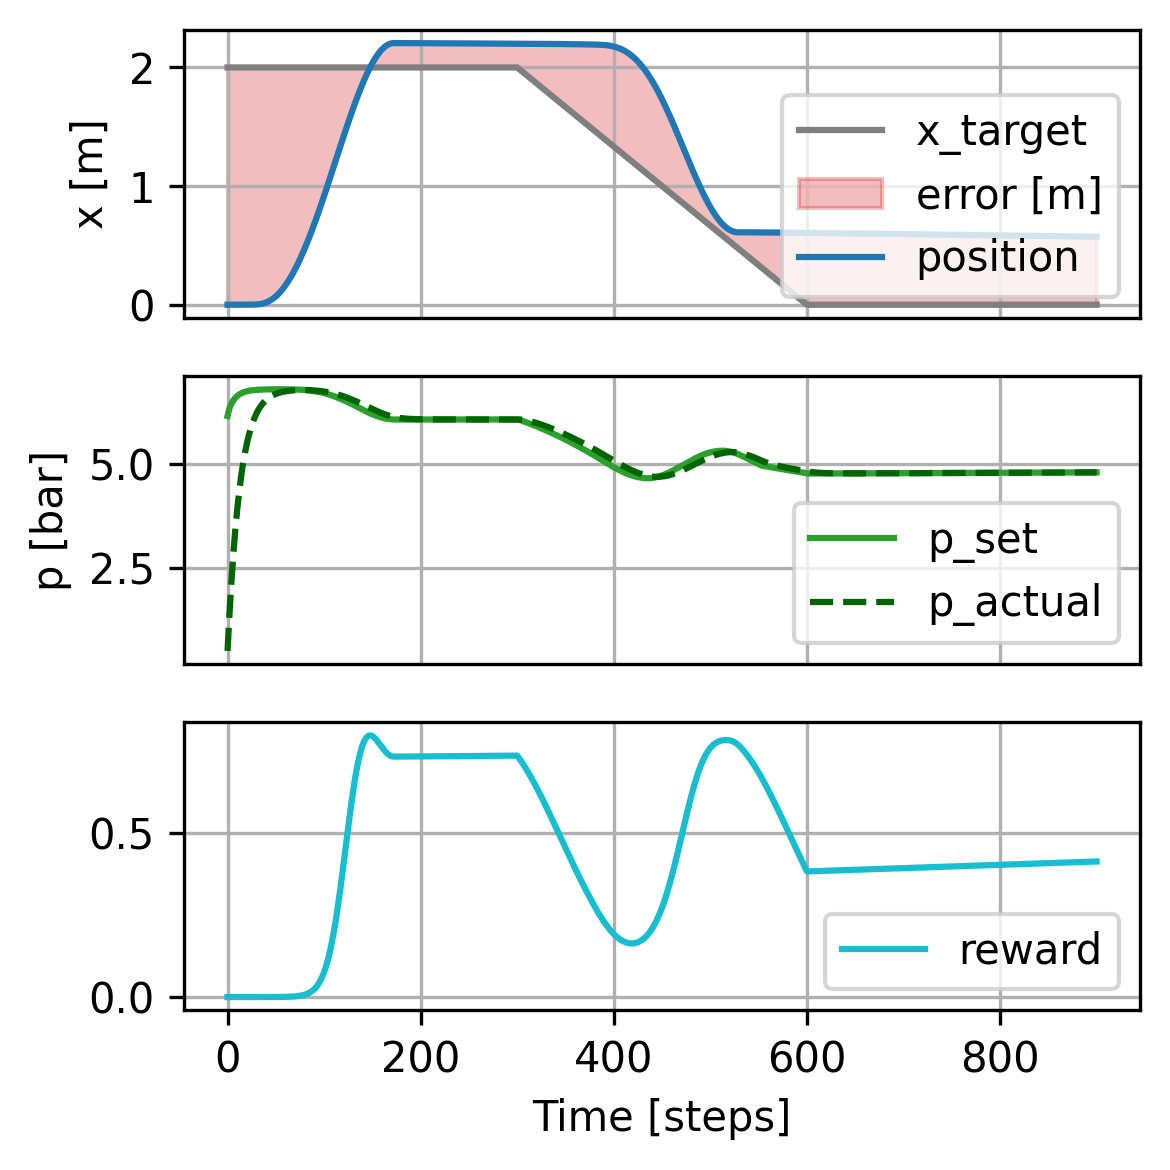

In [134]:
look('141','base')

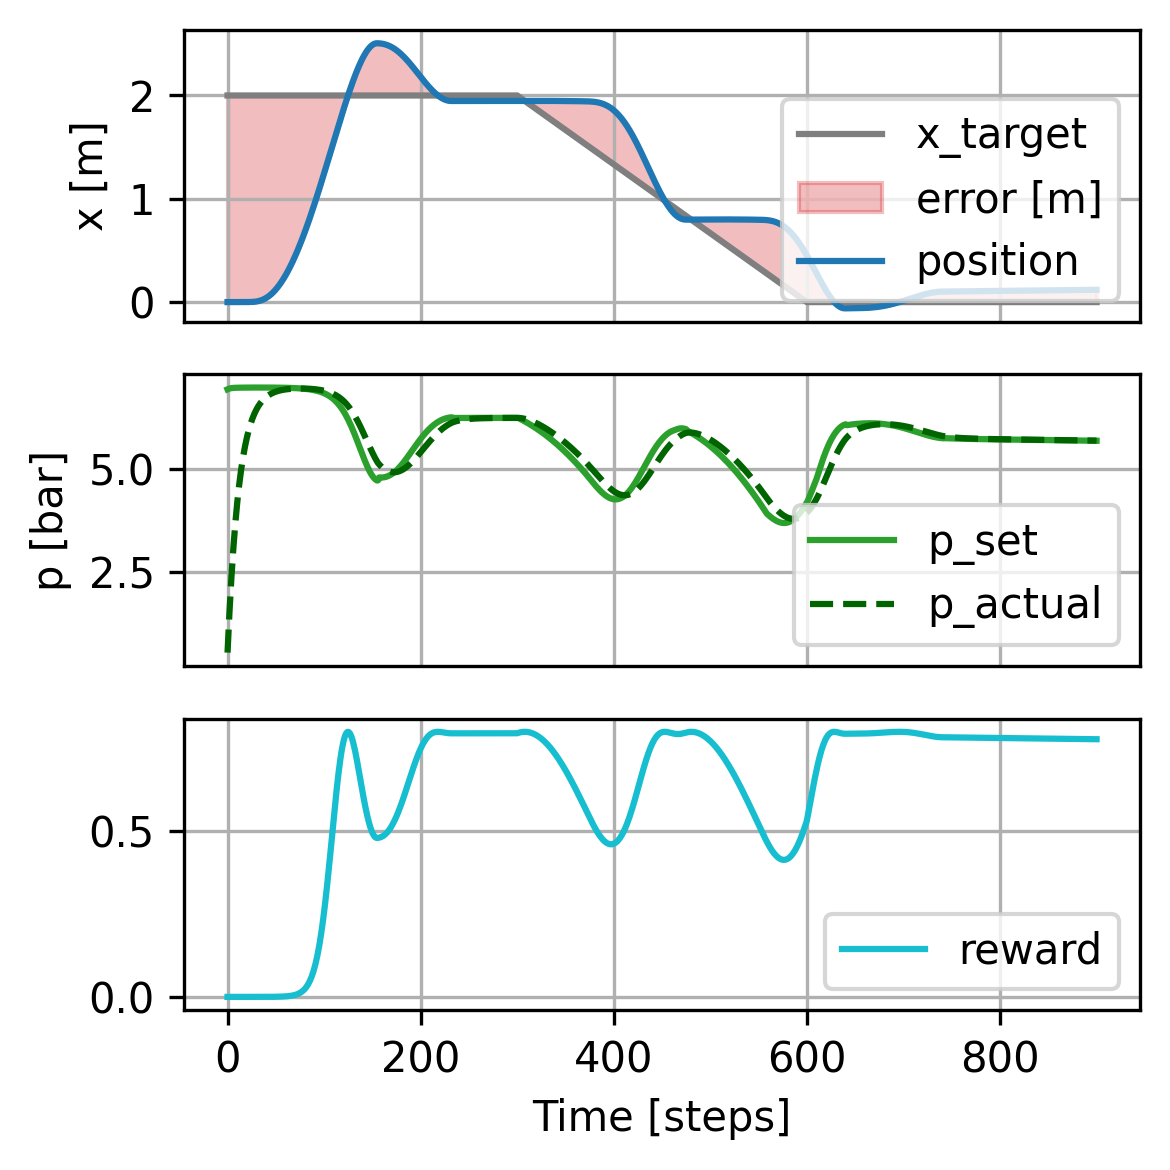

In [135]:
look('142','base')